# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

### Load dataset

In [2]:
train = pd.read_csv(r"C:\Users\matth\Desktop\Disease-Prediction-ML-Flask-main\Disease-Prediction-ML-Flask-main\Data\Training.csv")
test = pd.read_csv(r"C:\Users\matth\Desktop\Disease-Prediction-ML-Flask-main\Disease-Prediction-ML-Flask-main\Data\Testing.csv")

In [3]:
train.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
train.shape

(4920, 134)

In [5]:
train['Unnamed: 133'].value_counts()

Series([], Name: count, dtype: int64)

In [6]:
train.drop("Unnamed: 133",axis = 1, inplace = True)

In [7]:
train.isnull().sum().sum()

0

In [8]:
train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [9]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [11]:
test.shape


(42, 133)

In [12]:
len(train.prognosis.unique())

41

In [13]:
train.prognosis.value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [14]:
for i in train.columns:
    print(train[i].value_counts())

itching
0    4242
1     678
Name: count, dtype: int64
skin_rash
0    4134
1     786
Name: count, dtype: int64
nodal_skin_eruptions
0    4812
1     108
Name: count, dtype: int64
continuous_sneezing
0    4698
1     222
Name: count, dtype: int64
shivering
0    4812
1     108
Name: count, dtype: int64
chills
0    4122
1     798
Name: count, dtype: int64
joint_pain
0    4236
1     684
Name: count, dtype: int64
stomach_pain
0    4698
1     222
Name: count, dtype: int64
acidity
0    4698
1     222
Name: count, dtype: int64
ulcers_on_tongue
0    4812
1     108
Name: count, dtype: int64
muscle_wasting
0    4812
1     108
Name: count, dtype: int64
vomiting
0    3006
1    1914
Name: count, dtype: int64
burning_micturition
0    4704
1     216
Name: count, dtype: int64
spotting_ urination
0    4812
1     108
Name: count, dtype: int64
fatigue
0    2988
1    1932
Name: count, dtype: int64
weight_gain
0    4806
1     114
Name: count, dtype: int64
anxiety
0    4806
1     114
Name: count, dtype: int64
c

### Data Preprocessing and Exploration

In [15]:
train['fluid_overload'].unique()

array([0], dtype=int64)

In [16]:
train.drop('fluid_overload',axis = 1, inplace = True)

In [17]:
train.drop(['weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
           'yellow_urine','acute_liver_failure','swelling_of_stomach',
           'drying_and_tingling_lips','continuous_feel_of_urine',
          'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
          'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
          'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
          'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
          'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
          'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
          'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
          'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'],axis =1, inplace = True)

Text(0.5, 1.0, 'Distribution of Headache symptom')

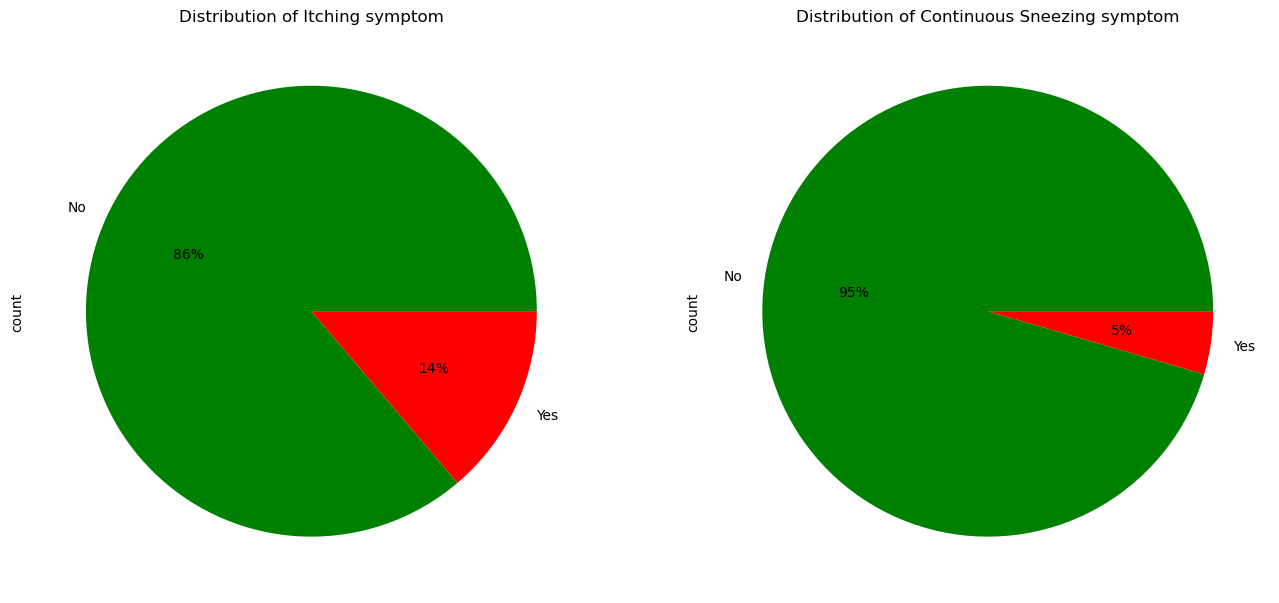

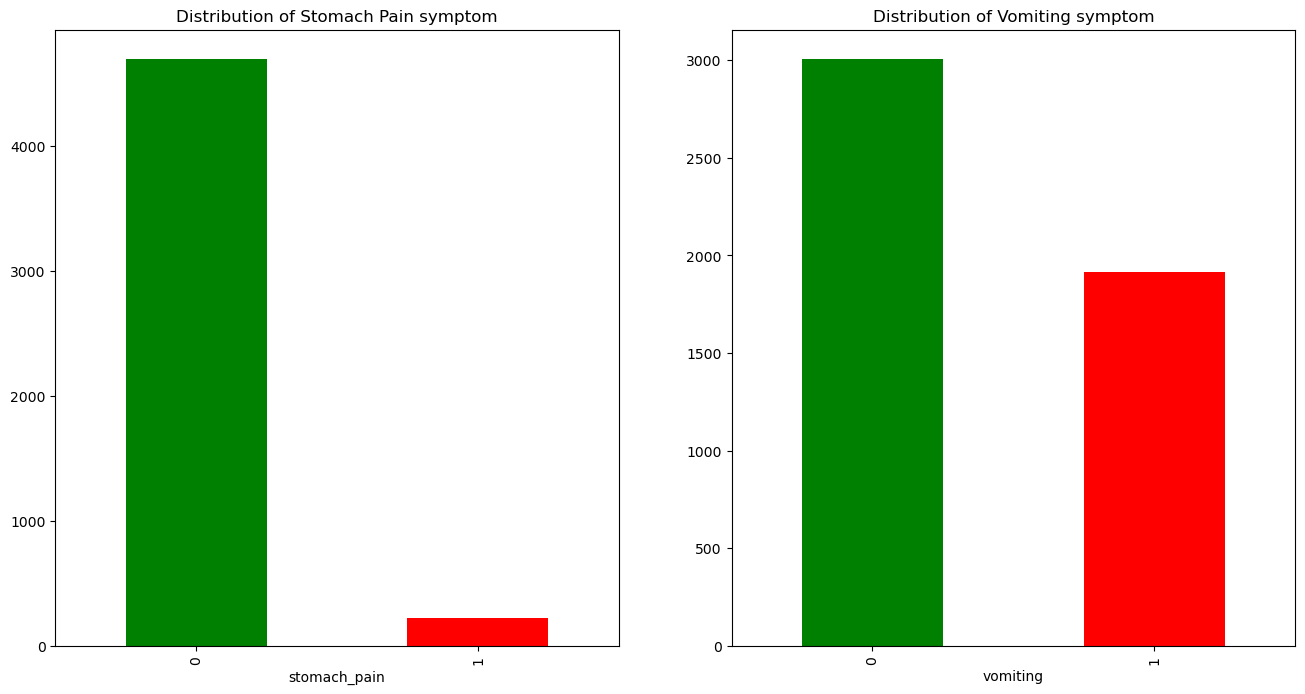

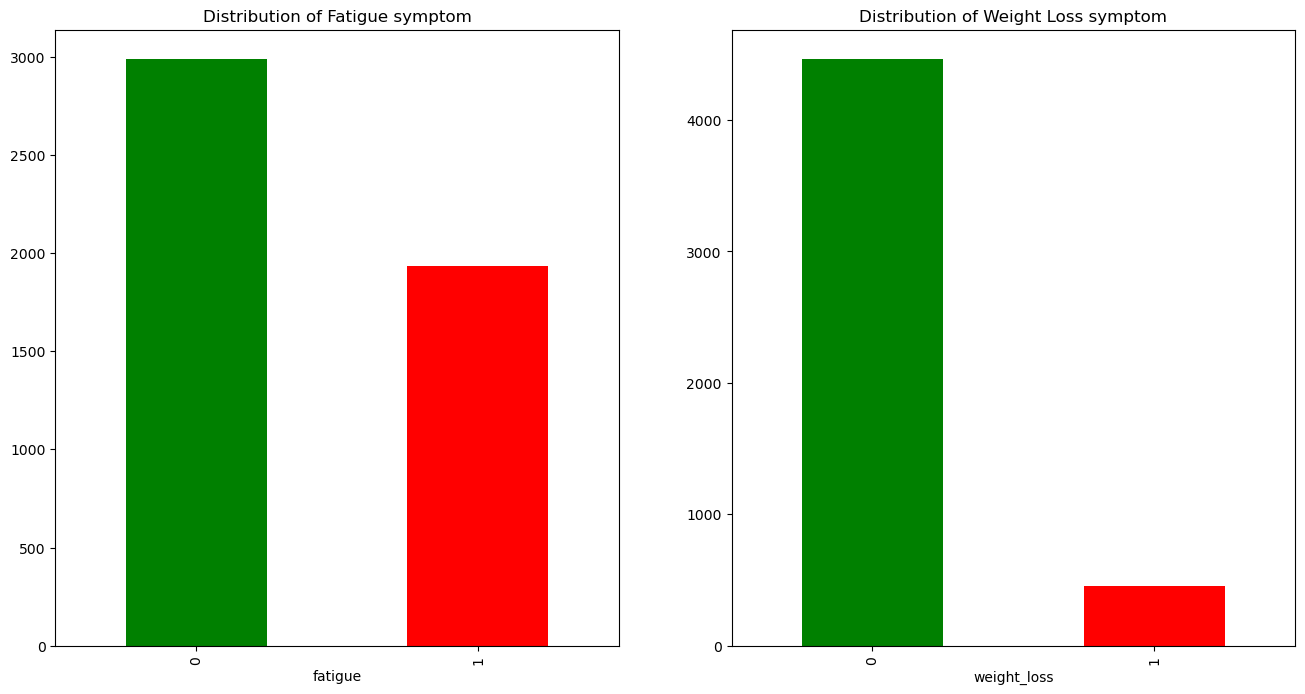

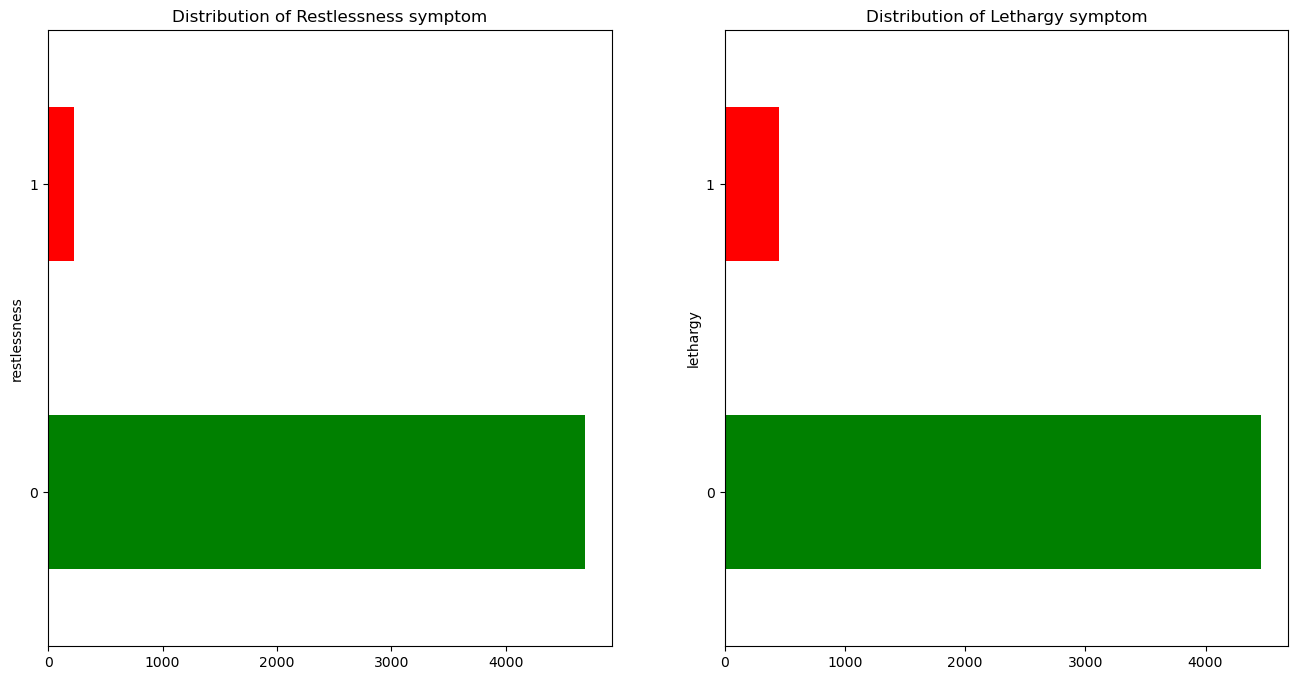

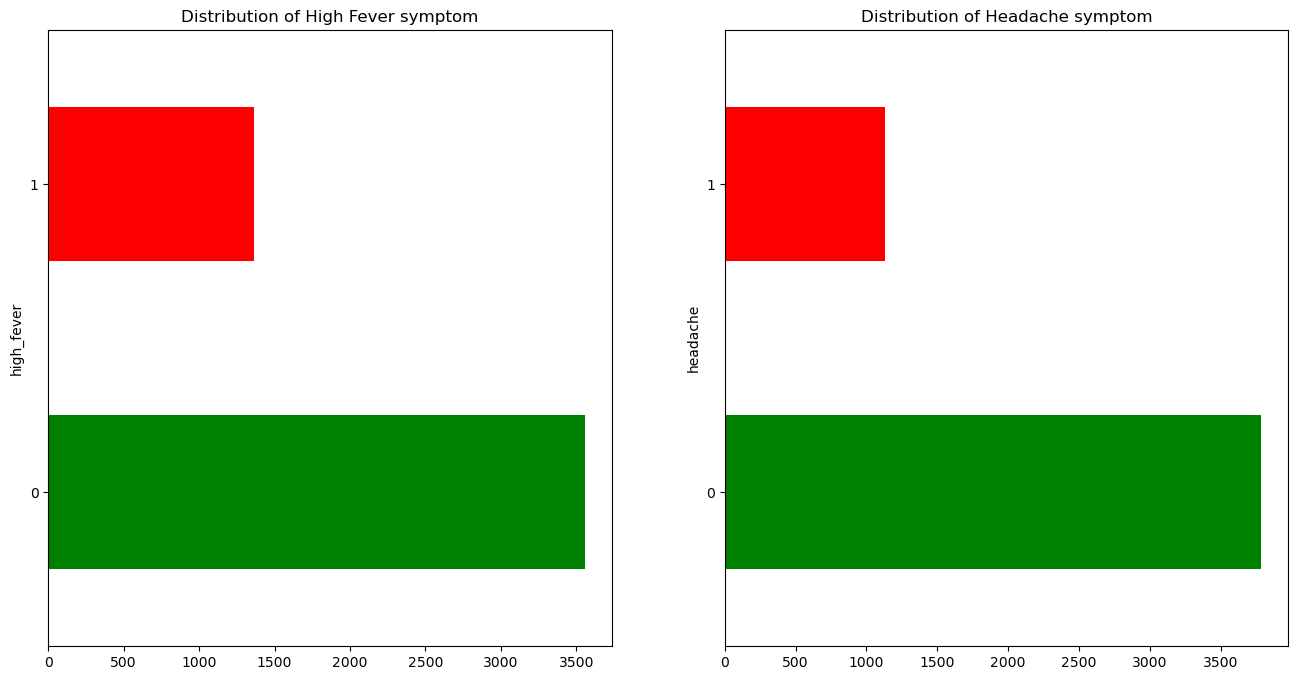

In [18]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
train['itching'].value_counts().plot(kind='pie', labels=['No', 'Yes'], autopct='%.0f%%', colors=['g', 'r'])
plt.title("Distribution of Itching symptom")

plt.subplot(1, 2, 2)
train['continuous_sneezing'].value_counts().plot(kind='pie', labels=['No', 'Yes'], autopct='%.0f%%', colors=['g', 'r'])
plt.title("Distribution of Continuous Sneezing symptom")

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
train['stomach_pain'].value_counts().plot(kind='bar', color=['g', 'r'])
plt.title("Distribution of Stomach Pain symptom")

plt.subplot(1, 2, 2)
train['vomiting'].value_counts().plot(kind='bar', color=['g', 'r'])
plt.title("Distribution of Vomiting symptom")

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
train['fatigue'].value_counts().plot(kind='bar', color=['g', 'r'])
plt.title("Distribution of Fatigue symptom")

plt.subplot(1, 2, 2)
train['weight_loss'].value_counts().plot(kind='bar', color=['g', 'r'])
plt.title("Distribution of Weight Loss symptom")

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
train['restlessness'].value_counts().plot(kind='barh', color=['g', 'r'])
plt.title("Distribution of Restlessness symptom")

plt.subplot(1, 2, 2)
train['lethargy'].value_counts().plot(kind='barh', color=['g', 'r'])
plt.title("Distribution of Lethargy symptom")

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
train['high_fever'].value_counts().plot(kind='barh', color=['g', 'r'])
plt.title("Distribution of High Fever symptom")

plt.subplot(1, 2, 2)
train['headache'].value_counts().plot(kind='barh', color=['g', 'r'])
plt.title("Distribution of Headache symptom")

Text(0.5, 1.0, 'Violin Plot of Vomiting by Prognosis')

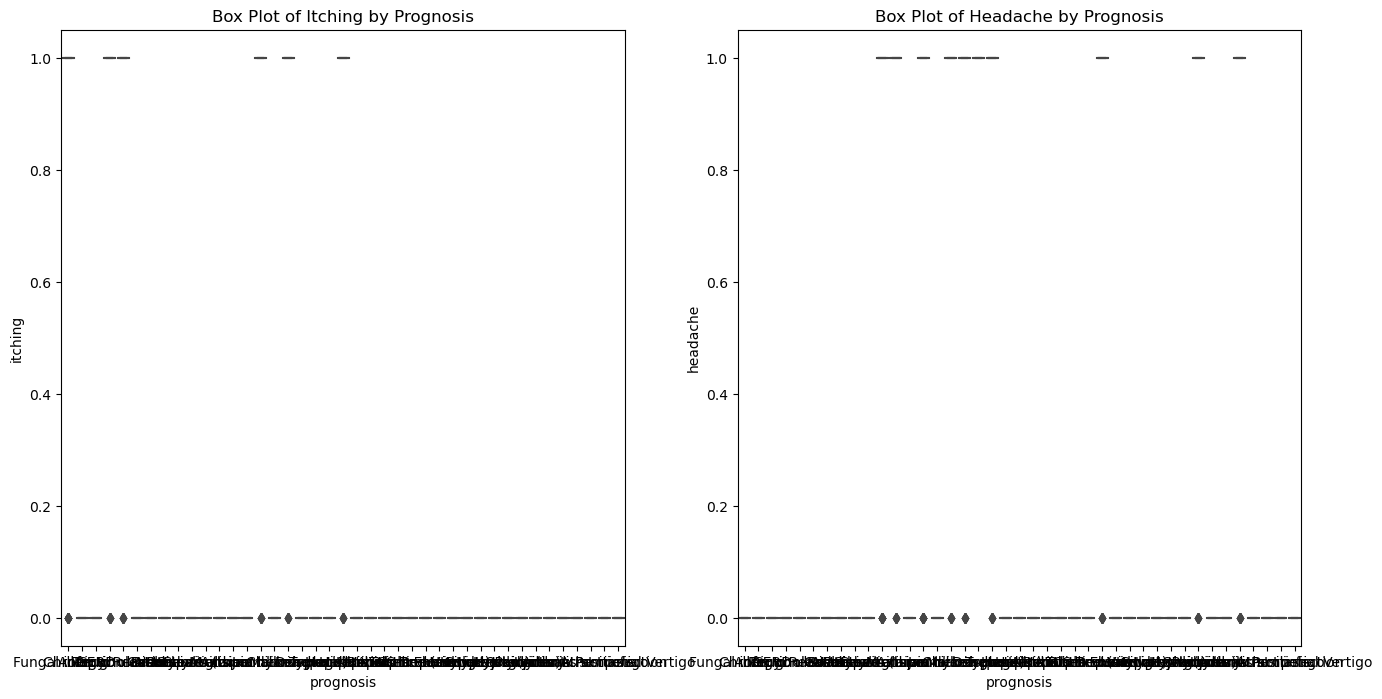

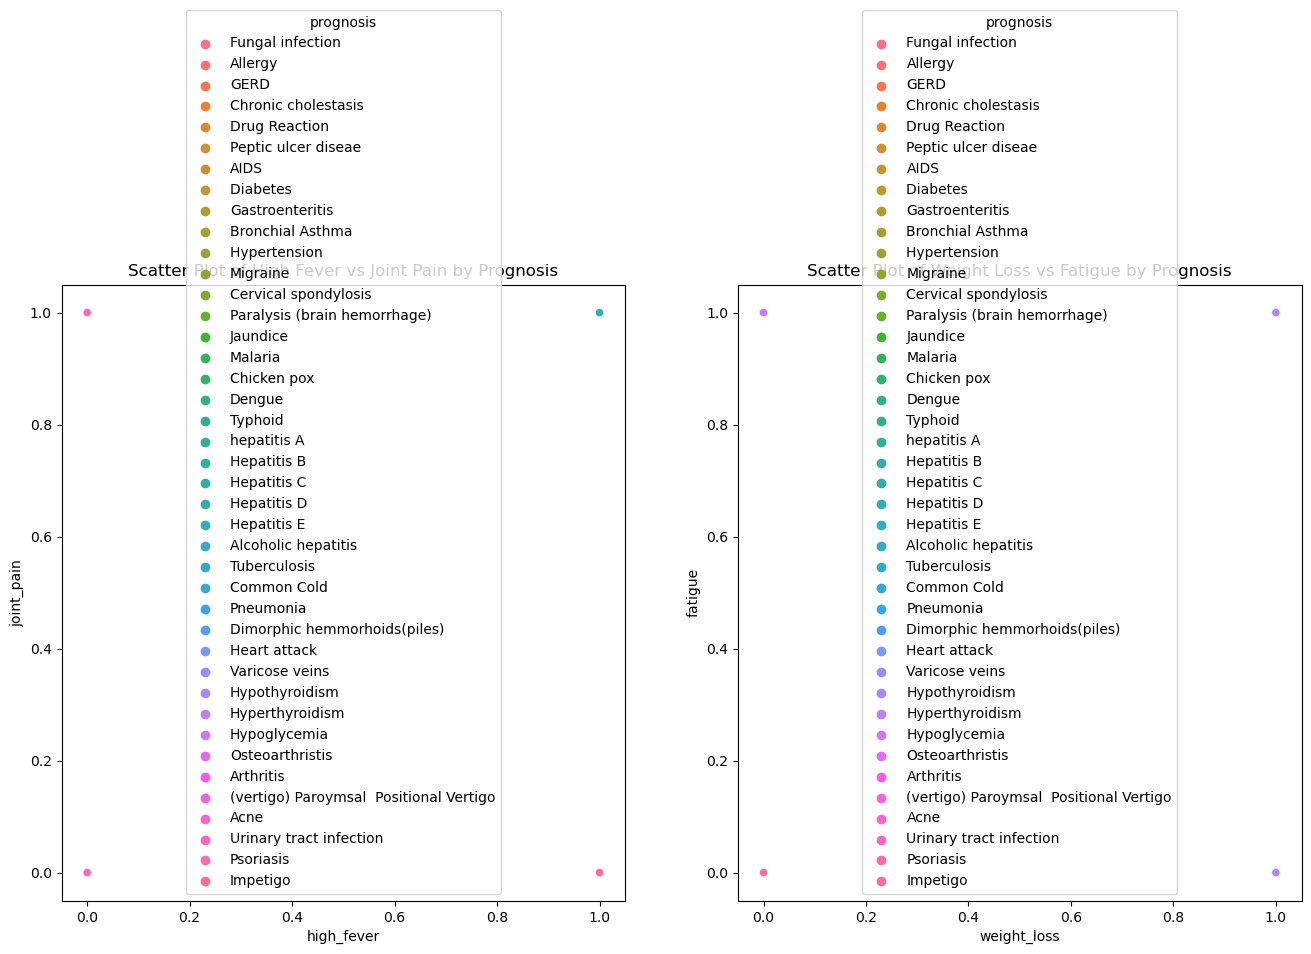

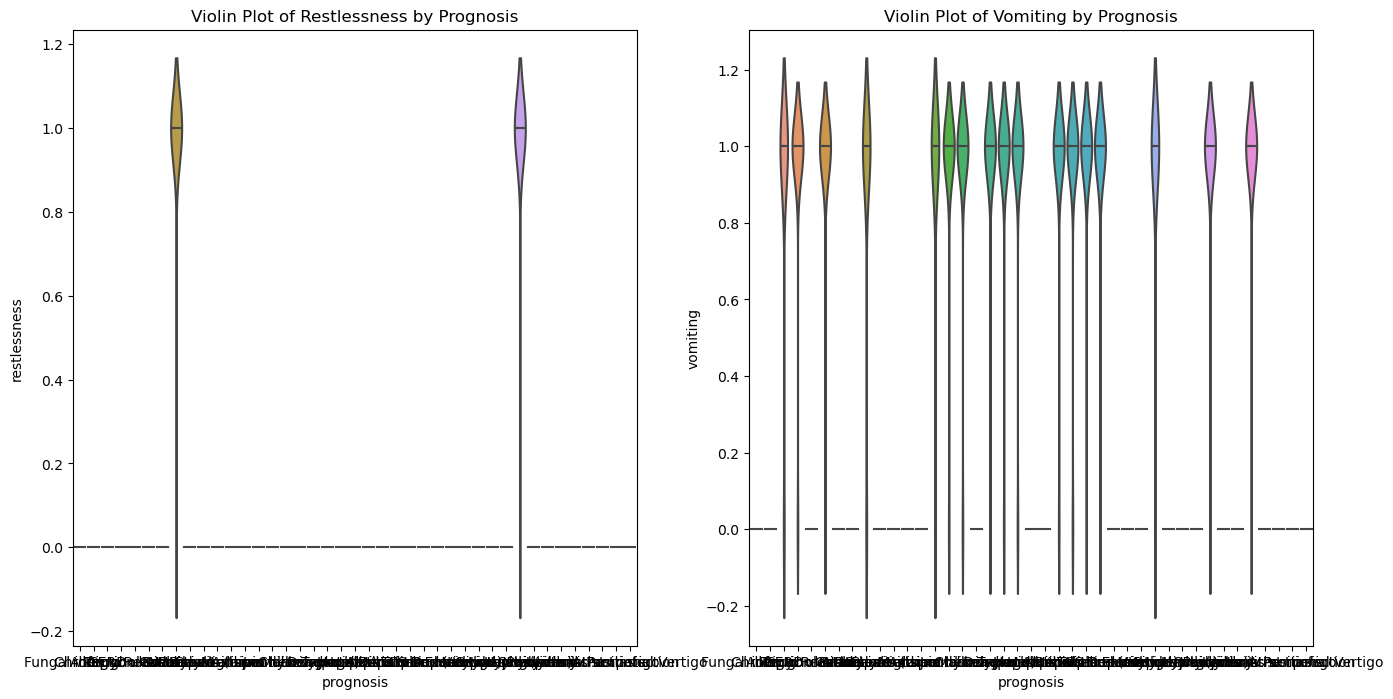

In [19]:
# Box Plots
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='prognosis', y='itching', data=train)
plt.title("Box Plot of Itching by Prognosis")

plt.subplot(1, 2, 2)
sns.boxplot(x='prognosis', y='headache', data=train)
plt.title("Box Plot of Headache by Prognosis")

# Scatter Plots
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x='high_fever', y='joint_pain', data=train, hue='prognosis')
plt.title("Scatter Plot of High Fever vs Joint Pain by Prognosis")

plt.subplot(1, 2, 2)
sns.scatterplot(x='weight_loss', y='fatigue', data=train, hue='prognosis')
plt.title("Scatter Plot of Weight Loss vs Fatigue by Prognosis")


# Violin Plots
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.violinplot(x='prognosis', y='restlessness', data=train, inner='quart')
plt.title("Violin Plot of Restlessness by Prognosis")

plt.subplot(1, 2, 2)
sns.violinplot(x='prognosis', y='vomiting', data=train, inner='quart')
plt.title("Violin Plot of Vomiting by Prognosis")


In [20]:
train[(train['itching'] == 1) & (train['stomach_pain'] == 1)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
40,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
41,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
43,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
44,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
46,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4760,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4801,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4842,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


Text(0.5, 1.0, 'Importance of Itching symptom to determine Fungal Infection')

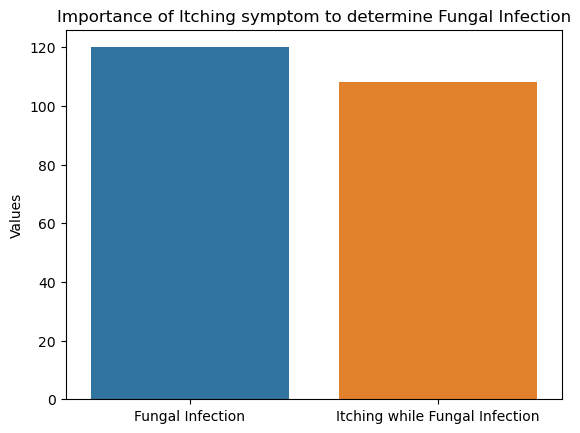

In [21]:
a = len(train[train['prognosis'] == 'Fungal infection'])
b = len(train[(train['itching'] == 1) & (train['prognosis'] == 'Fungal infection')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Fungal Infection','Itching while Fungal Infection'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of Itching symptom to determine Fungal Infection')

Text(0.5, 1.0, 'Importance of High Fever symptom to determine Jaundice')

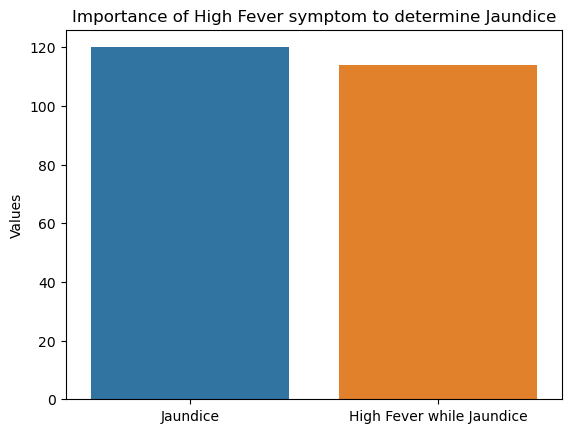

In [22]:
a = len(train[train['prognosis'] == 'Jaundice'])
b = len(train[(train['high_fever'] == 1) & (train['prognosis'] == 'Jaundice')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Jaundice','High Fever while Jaundice'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of High Fever symptom to determine Jaundice')

Text(0.5, 1.0, 'Importance of Yellowing of Eyes symptom to determine Tuberculosis')

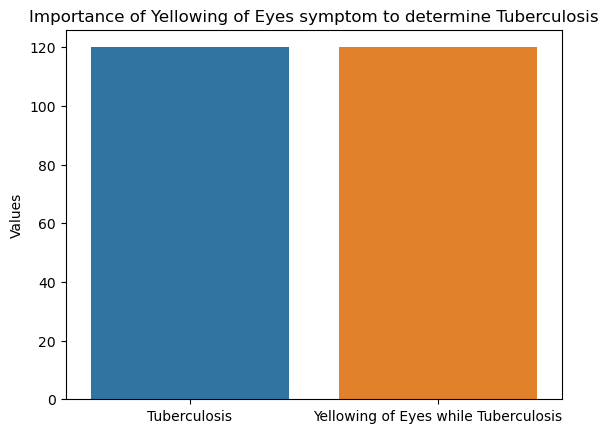

In [23]:

a = len(train[train['prognosis'] == 'Tuberculosis'])
b = len(train[(train['yellowing_of_eyes'] == 1) & (train['prognosis'] == 'Tuberculosis')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Tuberculosis','Yellowing of Eyes while Tuberculosis'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of Yellowing of Eyes symptom to determine Tuberculosis')

Text(0.5, 1.0, 'Importance of History of Consumption symptom to determine Alcoholic hepatitis')

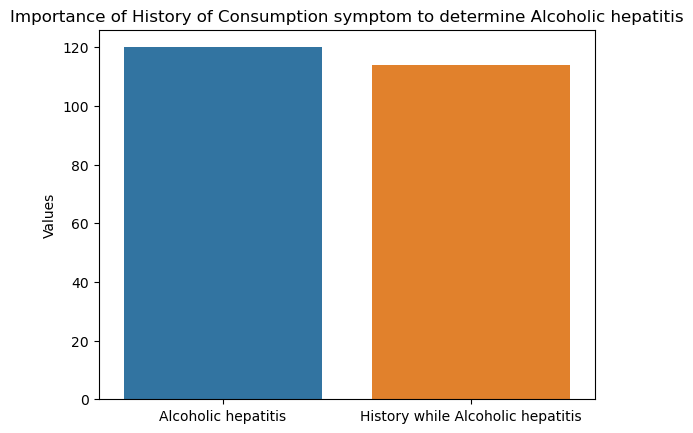

In [24]:

a = len(train[train['prognosis'] == 'Alcoholic hepatitis'])
b = len(train[(train['history_of_alcohol_consumption'] == 1) & (train['prognosis'] == 'Alcoholic hepatitis')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Alcoholic hepatitis','History while Alcoholic hepatitis'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of History of Consumption symptom to determine Alcoholic hepatitis')

In [25]:
a = train[train['prognosis'] == 'Tuberculosis']
a.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
250,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
251,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
252,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
253,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
254,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis


C:\Users\matth\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='weight_loss', ylabel='fatigue'>

C:\Users\matth\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


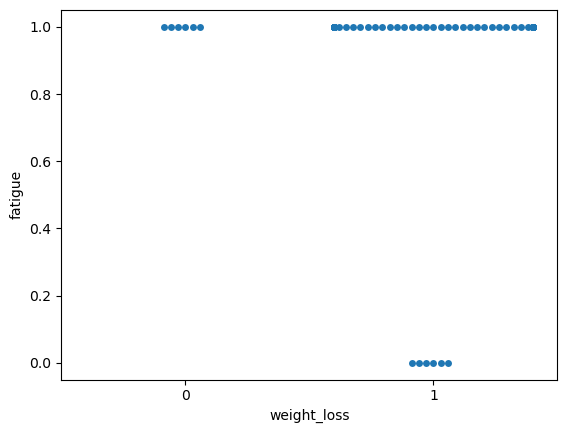

In [26]:
sns.swarmplot(x = a['weight_loss'], y = a['fatigue'])

In [27]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [28]:
def data_preprocessing(data):
    data.drop(['fluid_overload','weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
           'yellow_urine','acute_liver_failure','swelling_of_stomach',
           'drying_and_tingling_lips','continuous_feel_of_urine',
          'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
          'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
          'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
          'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
          'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
          'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
          'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
          'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'],axis =1, inplace = True)
    return data

In [29]:
X = train.drop('prognosis',axis = 1)
y = train.prognosis

### Model Building and Evaluation

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

In [31]:
test = data_preprocessing(test)

In [32]:
X_test = test.drop('prognosis',axis = 1)
y_test = test.prognosis

In [33]:
def model_evaluation(classifier):
    y_pred = classifier.predict(X_val)
    yt_pred = classifier.predict(X_train)
    y_pred1 = classifier.predict(X_test)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Validation Accuracy of the algorithm is ', accuracy_score(y_val, y_pred))
    print('The Testing Accuracy of the algorithm is', accuracy_score(y_test, y_pred1))
    return [(accuracy_score(y_train, yt_pred)), (accuracy_score(y_val, y_pred)), (accuracy_score(y_test, y_pred1))]

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [35]:
bn_results = model_evaluation(nb)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 1.0


In [36]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [37]:
knn_results = model_evaluation(knn)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 1.0


In [38]:
svm = SVC(C=1)
svm.fit(X_train, y_train)

SVC(C=1)

In [39]:
svm_results = model_evaluation(svm)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 1.0


In [40]:
dtc = DecisionTreeClassifier(max_features= 10)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_features=10)

In [41]:
dtc_results = model_evaluation(dtc)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 0.9761904761904762


In [42]:
rfc = RandomForestClassifier(max_depth = 13)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=13)

In [43]:
rfc_results = model_evaluation(rfc)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 0.9761904761904762


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0).fit(X_train, y_train)

In [45]:
gbc_results = model_evaluation(gbc)

The Training Accuracy of the algorithm is  0.02540650406504065
The Validation Accuracy of the algorithm is  0.02032520325203252
The Testing Accuracy of the algorithm is 0.023809523809523808


In [46]:
results = pd.DataFrame(data = [bn_results,knn_results, svm_results, dtc_results, rfc_results],
                      columns= ['Training Accuracy','Validation Accuracy', 'Testing Accuracy'],
                      index = ['Naive Bayes Classifier','K Nearest Neighbors Classifier','Support Vector Machines',
                               'Decision Trees Classifier', 'Random Forest Classifier'])

In [47]:
results

,Training Accuracy,Validation Accuracy,Testing Accuracy
Naive Bayes Classifier,1.0,1.0,1.00000
K Nearest Neighbors Classifier,1.0,1.0,1.00000
Support Vector Machines,1.0,1.0,1.00000
Decision Trees Classifier,1.0,1.0,0.97619
Random Forest Classifier,1.0,1.0,0.97619


In [48]:
a = rfc.feature_importances_

In [49]:
col = X.columns

In [50]:
feat_imp = {}
for i, j in zip(a,col):
    feat_imp[j] = i

In [51]:
feat_imp

{'itching': 0.007687732911080633,
 'skin_rash': 0.006075032005958709,
 'nodal_skin_eruptions': 0.0085858112864366,
 'continuous_sneezing': 0.008735749431230117,
 'shivering': 0.0093903822600081,
 'chills': 0.010276646591287544,
 'joint_pain': 0.017972435591837636,
 'stomach_pain': 0.0037894209854895315,
 'acidity': 0.008039148046465237,
 'ulcers_on_tongue': 0.005039813212516978,
 'muscle_wasting': 0.008879554233978938,
 'vomiting': 0.010750237111054106,
 'burning_micturition': 0.005584982644645222,
 'spotting_ urination': 0.007934303431485677,
 'fatigue': 0.013403441430913812,
 'weight_loss': 0.011304676226088608,
 'restlessness': 0.013490822447106976,
 'lethargy': 0.01215697577611203,
 'patches_in_throat': 0.0025858358028222265,
 'cough': 0.011280196216235314,
 'high_fever': 0.014386340201314476,
 'sunken_eyes': 0.002448607453268551,
 'breathlessness': 0.007909231255383781,
 'sweating': 0.01197875400321317,
 'dehydration': 0.004953809450318352,
 'indigestion': 0.006261315677310155,
 '

In [52]:
def model_evaluation1(n_feat,classifier):
    y_pred = classifier.predict(X1_val)
    yt_pred = classifier.predict(X1_train)
    y_pred1 = classifier.predict(X1_test)
    return [(n_feat),(accuracy_score(y1_train, yt_pred)), (accuracy_score(y1_test, y_pred1))]

In [53]:
rfc_results = []
knn_results = []

In [54]:
for main in [0.020,0.018,0.016,0.014,0.012,0.01,0.008]:
    to_drop = []
    for i,j in zip(feat_imp.keys(),feat_imp.values()):
        if j < main:
            to_drop.append(i)
    
    X_new = X.drop(to_drop,axis = 1)
    y_new = y
    X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
    X1_test = X_test.drop(to_drop,axis = 1)
    y1_test = y_test
    rfc_new = RandomForestClassifier()
    rfc_new.fit(X1_train, y1_train)
    temp1 = model_evaluation1(X1_train.shape[1], rfc_new)
    rfc_results.append(temp1)
    knn_new = KNeighborsClassifier()
    knn_new.fit(X1_train, y1_train)
    temp2 = model_evaluation1(X1_train.shape[1],knn_new)
    knn_results.append(temp2)

In [55]:
randomf = pd.DataFrame(data = rfc_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])

In [56]:
randomf

,Number of features,Training Accuracy,Testing Accuracy
0,8,0.246443,0.238095
1,9,0.268039,0.261905
2,16,0.433181,0.428571
3,22,0.567327,0.595238
4,33,0.787348,0.785714
5,49,0.896341,0.880952
6,61,0.945630,0.928571


In [57]:
knn_table = pd.DataFrame(data = knn_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])

In [58]:
knn_table

,Number of features,Training Accuracy,Testing Accuracy
0,8,0.244665,0.238095
1,9,0.264736,0.261905
2,16,0.432419,0.428571
3,22,0.565549,0.571429
4,33,0.784299,0.785714
5,49,0.893801,0.880952
6,61,0.942835,0.928571


In [59]:
to_drop = []
for i,j in zip(feat_imp.keys(),feat_imp.values()):
    if j < 0.01:
        to_drop.append(i)

In [60]:
len(to_drop)

40

In [61]:
X_new = X.drop(to_drop,axis = 1)
y_new = y

In [62]:
X_new.head()

,chills,joint_pain,vomiting,fatigue,weight_loss,restlessness,lethargy,cough,high_fever,sweating,...,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,receiving_blood_transfusion,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,inflammatory_nails
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
X1_test = X_test.drop(to_drop,axis = 1)
y1_test = y_test

In [64]:
rfc_new = RandomForestClassifier()
rfc_new.fit(X1_train, y1_train)

RandomForestClassifier()

In [65]:
y_pred = rfc_new.predict(X1_val)
yt_pred = rfc_new.predict(X1_train)
y_pred1 = rfc_new.predict(X1_test)
print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt_pred))
print('The Validation Accuracy of the algorithm is ', accuracy_score(y1_val, y_pred))
print('The Testing Accuracy of the algorithm is', accuracy_score(y1_test, y_pred1))

The Training Accuracy of the algorithm is  0.895579268292683
The Validation Accuracy of the algorithm is  0.8810975609756098
The Testing Accuracy of the algorithm is 0.8809523809523809


In [66]:
knn_new = KNeighborsClassifier()
knn_new.fit(X1_train, y1_train)

KNeighborsClassifier()

In [67]:
y_pred = knn_new.predict(X1_val)
yt_pred = knn_new.predict(X1_train)
y_pred1 = knn_new.predict(X1_test)
print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt_pred))
print('The Validation Accuracy of the algorithm is ', accuracy_score(y1_val, y_pred))
print('The Testing Accuracy of the algorithm is', accuracy_score(y1_test, y_pred1))

The Training Accuracy of the algorithm is  0.8884654471544715
The Validation Accuracy of the algorithm is  0.891260162601626
The Testing Accuracy of the algorithm is 0.9047619047619048


In [68]:
test.join(pd.DataFrame(y_pred1,columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Fungal infection
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,Impetigo
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [69]:
X1_train.sum(axis = 1).max()

13

In [70]:
X1_train.columns

Index(['chills', 'joint_pain', 'vomiting', 'fatigue', 'weight_loss',
       'restlessness', 'lethargy', 'cough', 'high_fever', 'sweating',
       'headache', 'dark_urine', 'nausea', 'loss_of_appetite',
       'pain_behind_the_eyes', 'back_pain', 'diarrhoea', 'mild_fever',
       'yellowing_of_eyes', 'blurred_and_distorted_vision', 'phlegm',
       'congestion', 'chest_pain', 'fast_heart_rate', 'puffy_face_and_eyes',
       'excessive_hunger', 'knee_pain', 'muscle_weakness', 'stiff_neck',
       'swelling_joints', 'loss_of_balance', 'unsteadiness',
       'bladder_discomfort', 'passage_of_gases', 'depression', 'irritability',
       'muscle_pain', 'abnormal_menstruation', 'increased_appetite',
       'family_history', 'mucoid_sputum', 'rusty_sputum',
       'lack_of_concentration', 'receiving_blood_transfusion', 'coma',
       'history_of_alcohol_consumption', 'blood_in_sputum', 'palpitations',
       'inflammatory_nails'],
      dtype='object')

In [71]:
pickle.dump(knn_new, open('model.pkl','wb'))

In [72]:
corr_train = train.corr(numeric_only=True)
corr_train.style.background_gradient('coolwarm')
